# Напряжённость поля по известному потенциалу

Напряжённость электростатического поля $\mathbf {\vec{E}}$  и потенциал $\varphi$  связаны соотношением

$${\mathbf  {\vec{E}}}=-\nabla \varphi $$

Таким образом, по известному потенциалу $\varphi$ можно найти напряженность поля, вычислив градиент потенциала. В этом нам поможет библиотека символьных вычислений `SymPy`.

[SymPy](http://sympy.org/en/) – это библиотека для символьных вычислений. По функционалу она имеет много общего с Mathematica, плюс полученные результаты с легкостью превращаюся обратно в код Python(ну и еще все это бесплатно и свободно).

Начнем, как всегда, с импорта библиотек: `SymPy`, `NumPy` и `matplotlib`

In [66]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

В качестве примера, преобразуем выражение $(a + b)^{10}$. Для этого зададим `a` и `b` в качестве *символьных* переменных и воспользуемся функцией `expand`:

In [31]:
a, b  = sympy.symbols('a,b')
sympy.expand((a + b)**10)

a**10 + 10*a**9*b + 45*a**8*b**2 + 120*a**7*b**3 + 210*a**6*b**4 + 252*a**5*b**5 + 210*a**4*b**6 + 120*a**3*b**7 + 45*a**2*b**8 + 10*a*b**9 + b**10

Для того, чтобы взять производную, можно воспользоваться функцией `diff`:

In [32]:
sympy.diff((a + b)**10 , a)

10*(a + b)**9

## Пример 1

Определим напряженность электрического поля для потенциала $\varphi (x,y) = -xy$. Введем символьные переменные `x` и `y`, а затем зададим выражение для потенциала `phi`.

In [13]:
x,y = sympy.symbols('x,y')

In [36]:
phi = -x*y
phi

-x*y

Исходя из связи напряженности поля и потенциала, можно создать функцию, возвращающую компоненты напряженности электрического поля:

$$ E_x = - \frac{\partial{\varphi}}{\partial x} \
E_y = - \frac{\partial{\varphi}}{\partial{y}}$$

In [37]:
def E_field(phi):
    """
    Returns the electric field for a given potential
    
    Parameters
    ---------
    phi: SymPy symbolic function
        Potential
        
    Returns
    ---------
    E_x: SymPy symbolic function
        x-component of the vector field
    E_y: SymPy symbolic function
        y-component of the vector field
    """
    E_x = -phi.diff(x)
    E_y = -phi.diff(y)
    
    return E_x, E_y

In [59]:
from IPython.display import display,Latex
Latex('$E_x = {0}, E_y= {1}$'.format(*E_field(phi)))

<IPython.core.display.Latex object>

Теперь хорошо бы визуализировать линии потенциала и поля. Для этой цели воспользуемся функцией `lambdify`, которая превращает символьное уравнение SymPy в функцию. Нужно только указать, какие символы являются зависимыми, а какие – нет.

In [74]:
potential_fun = sympy.lambdify((x,y),phi)
field_fun = sympy.lambdify((x,y),E_field(phi))

Теперь все готово к построению графиков. Зададим число ячеек и границы расчетной сетки.

In [61]:
N = 101                     # Число узлов сетки в каждом направлении
x_start, x_end = -10.0, 10.0            # границы по x
y_start, y_end = -10.0, 10.0            # границы по y

x_ = numpy.linspace(x_start, x_end, N)    # одномерный массив x
y_ = numpy.linspace(y_start, y_end, N)    # одномерный массив y

X, Y = numpy.meshgrid(x_,y_,)       


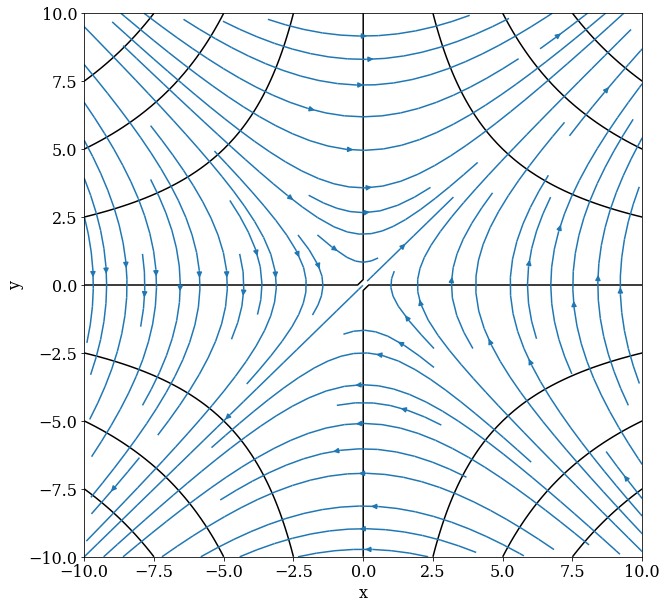

In [69]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.contour(X,Y,sympy.lambdify((x,y),phi)(X,Y),colors='k',linestyles='solid')
pyplot.streamplot(X,Y,*field_fun(X,Y));

Можно заметить, что эквипотенциали перпендикулярны силовым линиям поля.

## Пример 2

Повторим те же шаги для потенциала $\varphi(x,y)=1/x+1/y$

In [70]:
phi = 1/x + 1/y
phi

1/y + 1/x

In [73]:
Latex('$E_x = {0}, E_y= {1}$'.format(*E_field(phi)))

<IPython.core.display.Latex object>

In [75]:
potential_fun = sympy.lambdify((x,y),phi)
field_fun = sympy.lambdify((x,y),E_field(phi))

In [77]:
N = 100                     # Число узлов сетки в каждом направлении
x_start, x_end = -10.0, 10.0            # границы по x
y_start, y_end = -10.0, 10.0            # границы по y

x_ = numpy.linspace(x_start, x_end, N)    # одномерный массив x
y_ = numpy.linspace(y_start, y_end, N)    # одномерный массив y

X, Y = numpy.meshgrid(x_,y_,)    

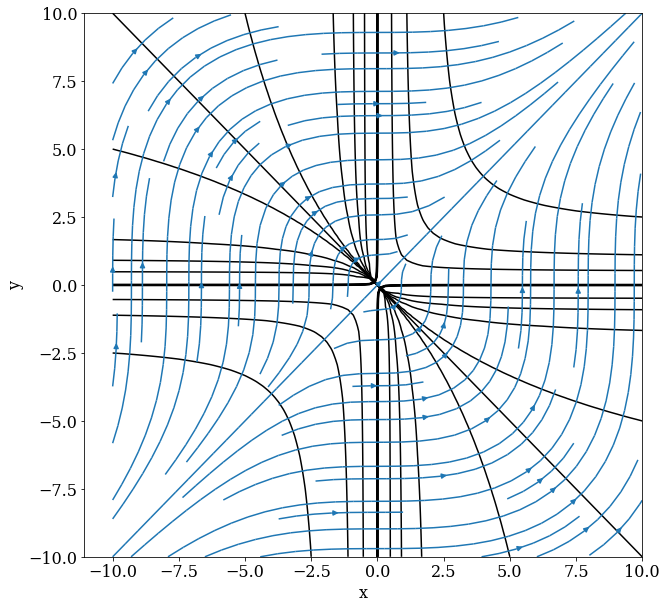

In [96]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
levels = [-2,-1,-0.5,-0.1,0,0.1,0.5,1,2]
pyplot.contour(X,Y,potential_fun(X,Y),levels,colors='k',linestyles='solid')
pyplot.streamplot(X,Y,*field_fun(X,Y));